#**Introduction**
In this notebook we are going to learn how to use Stable Diffusion to create and modify images using existing pipelines. We'll also take a brief look at the key components within the pipeline. Particullarly, we will cover:
- Generating images from text using the `StableDiffusionPipeline` and experimenting with the available arguments
- Seeing some of the key pipeline components in action
    - The VAE that makes this a 'latent diffusion model'
    - The tokenizer and text encoder that process the text prompt
    - The UNet itself
    - The scheduler




# **Setup and Imports**
Here we should make the setup which is required for us to work with Stable Diffusion models and we'll import the libraries needed for us to work with it.


In [1]:
!pip install -Uq diffusers ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 26.4 MB/s eta 0:00:00


In [2]:
!pip install -Uq git+https://github.com/huggingface/transformers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
import torch
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
# Set device
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)

# **Generating Images from the Text**
Let's load a Stable Diffusion pipeline we required. There are multiple different versions of Stable Diffusion, If we like to explore other version, simply replace the model ID with the appropriate model.   

In [5]:
pip install transformers

In [6]:
# Load the pipeline
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
import torch ;
a = torch.ones(1, device="cuda")

In [8]:
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 11.8 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import torch
from diffusers import StableDiffusionPipeline
import os

def get_token() -> str:
  return os.environ.get("HUGGING_FACE_TOKEN")

def save_images(images: list) -> list:

  output_files_names = []
  for id, image in enumerate(images):
    filename = f"output{id}.png"
    image.save(filename)
    output_files_names.append(filename)

  return output_files_names



def create_img(prompt :str):
  AUTH_TOKEN = get_token()
  generator = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1",
                                                        revision="fp16",
                                                        torch_dtype=torch.float16,
                                                        use_auth_token=AUTH_TOKEN)
  generator.to("cuda")
  prompt = [prompt]
  with torch.autocast("cuda"):
    images = generator(prompt).images
    output_paths = save_images(images)
  return output_paths

diffusers_app = gr.Interface(
        fn=create_img,
        inputs =
        [
          gr.Textbox(label="Write your prompt below", placeholder = "A squirrel bench pressing 200 kg"),
          #gr.Slider(value=1, minimum=1, maximum=8, step=1, label="Number of pictures to generate")
        ],
        outputs = gr.Gallery(label="Generated Images"),
        title="Text to Image with Stable Diffusion",
        description="This is a basic app to generate pictures with Stable Diffusion."
)

diffusers_app.launch(debug=True,share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://90407bc0dca95ddf9c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


model_index.json:   0%|          | 0.00/517 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:270: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-1 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/628 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': None} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


  0%|          | 0/50 [00:00<?, ?it/s]

After loading the pipeline into our device, let's start generating the images based on the prompt using the following code.



In [ ]:
# photo, a church in the middle of a island, bright cinematic lighting
# spheres made of glass falling into ocean, water is splashing, sun is setting
# a squirrel is inside a bright giantbright shiny crystal ball in on the surface of the blue ocean, there are few clouds in the sky
# A transparent sculpture of a duck made out of glass
# A strawberry splashing in the coffee in a mug under the starry sky
# interior of the house with furniture, sofas, tv
# panda mad scientist mixing sparkling chemicals, artstation
# a shiba inu wearing a beret and black turtleneck

In [ ]:
# Set up a generator for reproducibility
#generator = torch.Generator(device=device).manual_seed(50)

# Run the pipeline, showing some of the available arguments
pipe_output = pipe(
    prompt="A strawberry splashing in the coffee in a mug under the starry sky", # What to generate
    #negative_prompt="Oversaturated, blurry, low quality", # What NOT to generate
    height=480, width=640,     # Specify the image size
    guidance_scale=8,          # How strongly to follow the prompt
    num_inference_steps=35,    # How many steps to take
    #generator=generator        # Fixed random seed
)

# View the resulting image:
pipe_output.images[0]

Arguments used in the above cell:
- **Width and heigh**t specify the size of the generated image. They must be divisible by **8** for the VAE to work.
- **The number of steps** influences the generation quality. The default (50) works well, but in some cases you can get away with as few as 20 steps which is handy for experimentation.
- **The negative prompt** is used during the classifier-free guidance process, and can be a useful way to add additional control. You can leave it out, but many users find it useful to list some undesirable descriptions in the negative prompt as shown above.
- **The guidance_scale** argument determines how strong the classifier-free guidance (CFG) is.

# **Comparing guidance scales**
The Classifier-Free Guidance Scale, or “CFG Scale”, is a number (typically somewhere between 7.0 to 13.0) that’s described as controlling how much influence your input prompt has over the resulting generation.
## What Does “Guidance” Mean?
Stable Diffusion generates art by gradually “restoring” a noisy image into a piece of artwork. It does this gradually over a number of steps–making small adjustments to the image each time.

To decide what improvements to make to the image at each step, it looks at the noisy image and tries to puzzle out what it’s looking at.
And the CFG “Scale” refers to the ability to increase or decrease the amount of influence the text description has on the image generation.

In [ ]:
#@markdown comparing guidance scales:
cfg_scales = [1.1, 8, 12] #@param
prompt = "A skunk like puppy" #@param
fig, axs = plt.subplots(1, len(cfg_scales), figsize=(16, 5))
for i, ax in enumerate(axs):
  im = pipe(prompt, height=480, width=480,
    guidance_scale=cfg_scales[i], num_inference_steps=35,
    generator=torch.Generator(device=device).manual_seed(42)).images[0]
  ax.imshow(im); ax.set_title(f'CFG Scale {cfg_scales[i]}');

Higher scales push the generated images to better match the prompt, but if the scale is too high the results can become over-saturated and unpleasant.

If we look at carefully, we can conclude that anything in the 8-12 range produces better results than values below or above this range.

# **Pipeline Components**
In oreder to understand how the Stable Diffusion pipeline works, we'll see each component in action individually.

In [ ]:
print(list(pipe.components.keys())) # List components

## **Variational Autoencoder (VAE)**
The VAE (variational autoencoder) has been trained to squish down an image to a smaller representation and then re-create the image back from this compressed version again.

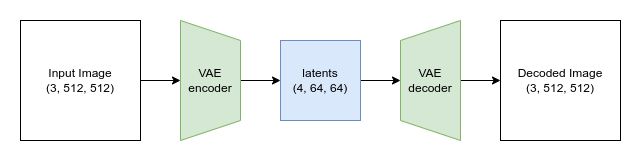

**Why do we even use an autoencoder?**

 We can do diffusion in pixel space - where the model gets all the image data as inputs and produces an output prediction of the same shape. But this means processing a LOT of data, and make high-resolution generation very computationally expensive. Some solutions to this involve doing diffusion at low resolution (64px for eg) and then training a separate model to upscale repeatedly (as with D2/Imagen). But latent diffusion instead does the diffusion process in this 'latent space', using the compressed representations from our AE rather than raw images. These representations are information rich, and can be small enough to handle manageably on consumer hardware. Once we've generated a new 'image' as a latent representation, the autoencoder can take those final latent outputs and turn them into actual pixels.


In [ ]:
#from base64 import b64encode

import numpy
from diffusers import AutoencoderKL, LMSDiscreteScheduler, UNet2DConditionModel
#from IPython.display import HTML
from torch import autocast
from torchvision import transforms as tfms
from tqdm.auto import tqdm
from transformers import CLIPTextModel, CLIPTokenizer, logging

torch.manual_seed(1)
#if not (Path.home()/'.huggingface'/'token').exists(): notebook_login()

# Supress some unnecessary warnings when loading the CLIPTextModel
logging.set_verbosity_error()

# Set device
torch_device = "cuda" if torch.cuda.is_available() else "cpu"

### **Loading the models**
In this we will download and set up the relevant models and components we'll be using.

In [ ]:
# Load the autoencoder model which will be used to decode the latents into image space.
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")

# Load the tokenizer and text encoder to tokenize and encode the text.
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

# The UNet model for generating the latents.
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet")

# The noise scheduler
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)

# To the GPU we go!
vae = vae.to(torch_device)
text_encoder = text_encoder.to(torch_device)
unet = unet.to(torch_device);

In [ ]:
def pil_to_latent(input_im):
    # Single image -> single latent in a batch (so size 1, 4, 64, 64)
    with torch.no_grad():
        latent = vae.encode(tfms.ToTensor()(input_im).unsqueeze(0).to(torch_device)*2-1) # Note scaling
    return 0.18215 * latent.latent_dist.sample()

def latents_to_pil(latents):
    # bath of latents -> list of images
    latents = (1 / 0.18215) * latents
    with torch.no_grad():
        image = vae.decode(latents).sample
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
    images = (image * 255).round().astype("uint8")
    pil_images = [Image.fromarray(image) for image in images]
    return pil_images

In this we are using one image as an example, in order to understand how the autoencoder works.

In [ ]:
!curl --output macaw.jpg 'https://th.bing.com/th/id/OIP.8Ml-yJ6WjkH1NYS2q-qwhAHaE8?w=284&h=189&c=7&r=0&o=5&dpr=1.3&pid=1.7'

In [ ]:
# Load the image with PIL
input_image = Image.open('macaw.jpg').resize((512, 512))
input_image

Encoding this into the latent space of the AE with the function defined above looks like this:

In [ ]:
# Encode to the latent space
encoded = pil_to_latent(input_image)
encoded.shape

In [ ]:
# Decode this latent representation back into an image
decoded = latents_to_pil(encoded)[0]
decoded

In this particular case the compression factor is 48, we start with a 3x512x512(chxhtxwd) image and it get compressed to a latent vector 4x64x64. Each 3x8x8 pixel volume in the input image gets compressed down to just 4 numbers(4x1x1). You can find AEs with a higher compression ratio but at some point they begin to introduce artifacts that we don't want.

## **Text Encoder and Tokenizer**

The goal of the text encoder is to turn an input string (the prompt) into a numerical representation that can be fed to the UNet as conditioning. The text is first turned into a series of tokens using the pipeline's tokenizer.The text encoder has a vocabulary of about 50k tokens - any word isn't in this vocabulary is split into smaller sub-words. The tokens are then fed through the text encoder model itself - a transformer model that was originally trained as the text encoder for CLIP.









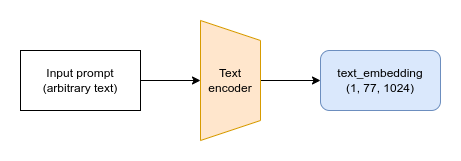



In [ ]:
# Our text prompt
prompt = 'A picture of a puppy'

Now let's begin with the tokenization.

In [ ]:
# Turn the text into a sequnce of tokens:
text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
text_input['input_ids'][0] # View the tokens

In [ ]:
# See the individual tokens
for t in text_input['input_ids'][0][:8]: # We'll just look at the first 7 to save you from a wall of '<|endoftext|>'
    print(t, tokenizer.decoder.get(int(t)))

To get the input embeddings, there are actually two steps - as revealed by inspecting text_encoder.text_model.embeddings:

In [ ]:
text_encoder.text_model.embeddings

### **Token embeddings**
The token is fed to the token_embedding to transform it into a vector. We can look at the embedding layer:

In [ ]:
# Access the embedding layer
token_emb_layer = text_encoder.text_model.embeddings.token_embedding
token_emb_layer # Vocab size 49408, emb_dim 768

This single token has been mapped to a 768-dimensional vector - the token embedding.

We can do the same with all of the tokens in the prompt to get all the token embeddings:

In [ ]:
token_embeddings = token_emb_layer(text_input.input_ids.to(torch_device))
print(token_embeddings.shape) # batch size 1, 77 tokens, 768 values for each
token_embeddings

### **Positional Embeddings**
Positional embeddings tell the model where in a sequence a token is. Much like the token embedding, this is a set of (optionally learnable) parameters.

In [ ]:
pos_emb_layer = text_encoder.text_model.embeddings.position_embedding
pos_emb_layer

We can get the positional embedding for each position:

In [ ]:
position_ids = text_encoder.text_model.embeddings.position_ids[:, :77]
position_embeddings = pos_emb_layer(position_ids)
print(position_embeddings.shape)
position_embeddings

### **Combining token and position embeddings**

In [ ]:
# And combining them we get the final input embeddings
input_embeddings = token_embeddings + position_embeddings
print(input_embeddings.shape)
input_embeddings

## **The UNet**
It is one of the most popular fully convolutional neural network that is designed to learn from fewer training samples.
The U-Net has an encoder part and a decoder part both comprised of ResNet blocks. The encoder compresses an image representation into a lower resolution image representation and the decoder decodes the lower resolution image representation back to the original higher resolution image representation that is supposedly less noisy. More specifically, the U-Net output predicts the noise residual which can be used to compute the predicted denoised image representation.

In [ ]:
# Dummy inputs:
timestep = pipe.scheduler.timesteps[0]
latents = torch.randn(1, 4, 64, 64).to(device)
text_embeddings = torch.randn(1, 77, 1024).to(device)

# Model prediction:
with torch.no_grad():
  unet_output = pipe.unet(latents, timestep, text_embeddings).sample
print('UNet output shape:', unet_output.shape) # Same shape as the input latents

## The Scheduler
The scheduler stores the noise schedule and manages updating the noisy sample based on the model predictions.During training, we add some noise to an image an then have the model try to predict the noise.During sampling, we want to 'denoise' over a number of steps. How many steps and how much noise we should aim for at each step are going to affect the final result.The scheduler is in charge of handling all of these details.


When we want to sample over a smaller number of steps, we set this up with scheduler.set_timesteps:

In [ ]:
# Setting the number of sampling steps:
scheduler.set_timesteps(15)

We can see how our new set of steps corresponds to those used in training:

In [ ]:
# See these in terms of the original 1000 steps used for training:
print(scheduler.timesteps)

And how much noise is present at each:

In [ ]:
# Look at the equivalent noise levels:
print(scheduler.sigmas)

During sampling, we'll start at a high noise level and gradually 'denoise' down to an image, according to this schedule.

In [ ]:
# Plotting this noise schedule:
plt.plot(scheduler.sigmas)
plt.title('Noise Schedule')
plt.xlabel('Sampling step')
plt.ylabel('sigma')
plt.show()

This 'sigma' is the amount of noise added to the latent representation. Let's visualize how it looks like by adding a bit of noise to our encoded image.

In [ ]:
noise = torch.randn_like(encoded) # Random noise
sampling_step = 10 # Equivalent to step 10 out of 15 in the schedule above
# encoded_and_noised = scheduler.add_noise(encoded, noise, timestep) # Diffusers 0.3 and below
encoded_and_noised = scheduler.add_noise(encoded, noise, timesteps=torch.tensor([scheduler.timesteps[sampling_step]]))
latents_to_pil(encoded_and_noised.float())[0] # Display

## Messing up with the embeddings

In [ ]:
#Generating an image with these modified embeddings

def generate_with_embs(text_embeddings):
    height = 512                        # default height of Stable Diffusion
    width = 512                         # default width of Stable Diffusion
    num_inference_steps = 30            # Number of denoising steps
    guidance_scale = 7.5                # Scale for classifier-free guidance
    #generator = torch.manual_seed(32)   # Seed generator to create the inital latent noise
    batch_size = 1

    max_length = text_input.input_ids.shape[-1]
    uncond_input = tokenizer(
      [""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt"
    )
    with torch.no_grad():
        uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]
    text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

    # Prep Scheduler
    scheduler.set_timesteps(num_inference_steps)

    # Prep latents
    latents = torch.randn(
    (batch_size, unet.in_channels, height // 8, width // 8),
    #generator=generator,
    )
    latents = latents.to(torch_device)
    latents = latents * scheduler.init_noise_sigma

    # Loop
    for i, t in tqdm(enumerate(scheduler.timesteps)):
        # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
        latent_model_input = torch.cat([latents] * 2)
        sigma = scheduler.sigmas[i]
        latent_model_input = scheduler.scale_model_input(latent_model_input, t)

        # predict the noise residual
        with torch.no_grad():
            noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings)["sample"]

        # perform guidance
        noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
        noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

        # compute the previous noisy sample x_t -> x_t-1
        latents = scheduler.step(noise_pred, t, latents).prev_sample

    return latents_to_pil(latents)[0]

In [ ]:
text_input1 = tokenizer(["A cat"], padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
text_input2 = tokenizer(["A mouse"], padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")
with torch.no_grad():
    text_embeddings1 = text_encoder(text_input1.input_ids.to(torch_device))[0]
    text_embeddings2 = text_encoder(text_input2.input_ids.to(torch_device))[0]

# Mix them together
mix_factor = 0.35
mixed_embeddings = (text_embeddings1*mix_factor + \
                   text_embeddings2*(1-mix_factor))

# Generate!
generate_with_embs(mixed_embeddings)

In [ ]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy xformers gradio -q